In [89]:
import os
import descarteslabs as dl
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import rasterio
from rasterio.warp import transform_bounds
from shapely.geometry import Polygon, MultiPolygon, mapping
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
try:
    import faiss
except ImportError:
    # esnure you are using this version due to a object depreciation that means \
    # the clustering does not run on the newer version
    os.system("pip3 install faiss-gpu==1.6.1 && conda install -c pytorch torchvision cudatoolkit=10.1 pytorch -y")
import faiss
try:
    import rioxarray as rxr
except ModuleNotFoundError: 
    os.system("pip install rioxarray")
import rioxarray as rxr



In [103]:
import models
from test import inference

In [104]:
DATA="/home/jovyan/gtc-exposure/cloud_free/test_images/"
ARCH="vgg16"
LR=0.01
K=8

df, model = inference(DATA, ARCH, LR, K)
df

,Informal,Cluster,geometry
0,not inf,1944,POLYGON ((-77.09616063729847 18.39582520197016...
1,not inf,1950,POLYGON ((-77.13243087895607 18.39656748292388...
2,not inf,623,POLYGON ((-77.08407094069003 18.39557624410748...
3,not inf,1880,POLYGON ((-77.07828755505284 18.38390972968482...
4,not inf,1388,POLYGON ((-77.10812076015301 18.40184447076541...
...,...,...,...
144,not inf,211,POLYGON ((-76.79482171978083 17.98075120626804...
145,not inf,1944,POLYGON ((-77.08959400763183 18.41878459761533...
146,not inf,1880,POLYGON ((-76.78249064955513 17.99202690372442...
147,not inf,1944,POLYGON ((-72.32117722249302 18.55846334721635...


(18.54, 18.59)

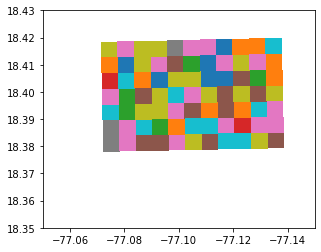

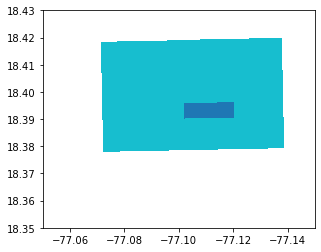

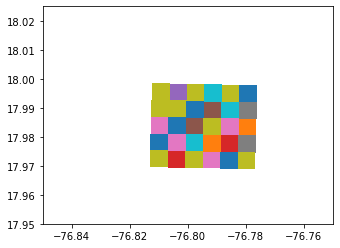

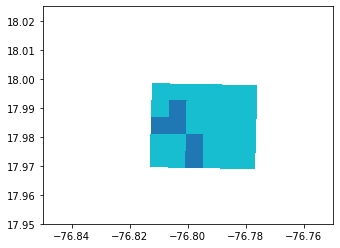

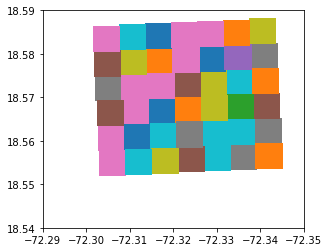

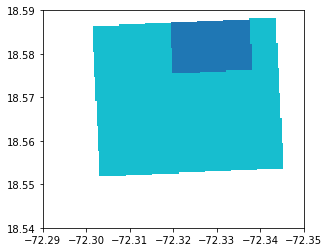

In [100]:
df.plot(df['Cluster'])
plt.xlim([-77.05,-77.15 ])
plt.ylim([18.35,18.43])
df.plot(df['Informal'])
plt.xlim([-77.05,-77.15 ])
plt.ylim([18.35,18.43])

df.plot(df['Cluster'])
plt.xlim([-76.85,-76.75])
plt.ylim([17.95,18.025])
df.plot(df['Informal'])
plt.xlim([-76.85,-76.75])
plt.ylim([17.95,18.025])

df.plot(df['Cluster'])
plt.xlim([-72.29,-72.350])
plt.ylim([18.54,18.59])
df.plot(df['Informal'])
plt.xlim([-72.29,-72.350])
plt.ylim([18.54,18.59])

In [116]:
clusters = list(df["Cluster"])
for i in set(clusters):
    print(i, clusters.count(i))
pred_inf_clusters = []
for i in range(len(df)):
    if df['Informal'].loc[i]=='inf':
        pred_inf_clusters.append(df['Cluster'].loc[i])

130 1
771 3
9 13
907 1
1037 1
1300 12
1944 28
1946 2
157 1
1950 12
1973 6
834 1
710 5
1105 6
211 6
1880 9
354 10
1388 27
623 1
1524 2
1908 1
1661 1


In [155]:
#calculate f1 score

def f1(df):
    pred_inf_clusters = []
    #find which cluster is contains the largest number of informal settlements
    for i in range(len(df)):
        if df['Informal'].loc[i]=='inf':
            pred_inf_clusters.append(df['Cluster'].loc[i])
    cluster = max(set(pred_inf_clusters), key=pred_inf_clusters.count)
    print(cluster)

    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0

    for i in range(len(df)):
        if df['Informal'].loc[i]=='inf' and df['Cluster'].loc[i] == cluster:
            true_pos+=1
        elif df['Informal'].loc[i]=='inf' and df['Cluster'].loc[i] != cluster:
            false_neg+=1
        elif df['Informal'].loc[i]=='not inf' and df['Cluster'].loc[i] != cluster:
            true_neg+=1
        else:
            false_pos+=1

    print(true_pos, true_neg, false_pos, false_neg)
    f1 = 2*(true_pos*true_pos)/((true_pos+false_pos)*(true_pos+false_neg))
    acc = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)
    return f1, acc

In [156]:
DATA="/home/jovyan/gtc-exposure/cloud_free/test_images/"
ARCH="vgg16"
LR=0.01

for K in [6, 8, 10, 12]:
    df, model = inference(DATA, ARCH, LR, K)
    print(f1(df))

815
7 63 72 7
(0.08860759493670886, 0.4697986577181208)
1388
4 112 23 10
(0.08465608465608465, 0.7785234899328859)
625
4 84 51 10
(0.04155844155844156, 0.5906040268456376)
1131
4 105 30 10
(0.06722689075630252, 0.7315436241610739)
